<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
%matplotlib inline

In [34]:
path = r'Q:\ExcelDataAnalysis-BusinessModeling\food_inspection_xls.xlsx'
df = pd.read_excel(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190795 entries, 0 to 190794
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Name                        190795 non-null  object        
 1   Program Identifier          190732 non-null  object        
 2   Inspection Date             190490 non-null  datetime64[ns]
 3   Description                 190795 non-null  object        
 4   Address                     190766 non-null  object        
 5   City                        190795 non-null  object        
 6   Zip Code                    190795 non-null  int64         
 7   Phone                       123246 non-null  object        
 8   Longitude                   190537 non-null  float64       
 9   Latitude                    190537 non-null  float64       
 10  Inspection Business Name    190490 non-null  object        
 11  Inspection Type             190490 non-

In [35]:
# Look at the unique city names
df['City'].unique()

array(['SEATTLE', 'Seattle', 'Renton', 'BELLEVUE', 'KENT', 'KENMORE',
       'Bellevue', 'Issaquah', 'Bothell', 'WOODINVILLE', 'Kent', 'RENTON',
       'FEDERAL WAY', 'Kirkland', 'Auburn', 'BURIEN', 'Federal Way',
       'DES MOINES', 'SHORELINE', 'Redmond', 'Woodinville',
       'Maple Valley', 'BLACK DIAMOND', 'REDMOND', 'BOTHELL', 'COVINGTON',
       'AUBURN', 'KIRKLAND', 'SNOQUALMIE', 'ENUMCLAW', 'TUKWILA',
       'LAKE FOREST PARK', 'SAMMAMISH', 'ISSAQUAH', 'MAPLE VALLEY',
       'NORMANDY PARK', 'MERCER ISLAND', 'NORTH BEND', 'SEA TAC',
       'VASHON ISLAND', 'SEATAC', 'Mercer Island', 'Pacific', 'NEWCASTLE',
       'North Bend', 'Duvall', 'SEAHURST', 'Enumclaw', 'CLYDE HILL',
       'DUVALL', 'SNOQUALMIE PASS', 'PACIFIC', 'Black Diamond',
       'Snoqualmie', 'Carnation', 'PRESTON', 'KING COUNTY', 'Vashon',
       'CARNATION', 'Skykomish', 'Fall City', 'ALGONA', 'SEATTLE, SOUTH',
       'Baring', 'FALL CITY', 'LYNNWOOD', 'MOUNTLAKE TERRACE', 'HOBART',
       'EVERETT', 'RAVENSD

In [36]:
df['City'] = df['City'].astype(str)

In [37]:
# Remove symbols in phone number
df['Phone'] = df['Phone'].str.replace(pat="\(|\)|-|=", repl="", regex=True)

In [38]:
# Remove letters in phone number
df['Phone'] = df['Phone'].str.replace(pat="EXT", repl="", regex=True)

In [39]:
# Remove letters in phone number
df['Phone'] = df['Phone'].str.replace(pat="X", repl="", regex=True)

In [40]:
df['Phone'] = df['Phone'].str.replace(' ', '')

In [41]:
df['Phone'].unique()

array(['2069471460', nan, '2062714968', ..., '3606980417', '2065750500',
       '2067818600'], dtype=object)

In [42]:
# Remove NaNs
df = df[df['Phone'].notna()]
df = df[df['Phone'] != 'nan']

In [43]:
# Remove NaNs
df = df[df['Inspection Score'].notna()]
df = df[df['Inspection Score'] != 'nan']

In [44]:
#

In [45]:
df['Phone'].apply(lambda x: ' '.join(x[:10].split(' ')[:-1]) if len(x) > 10 else x)

0         2069471460
1         2069471460
2         2069471460
3         2069471460
4         2069471460
             ...    
190790    2067818600
190791    2067818600
190792    2067818600
190793    2067818600
190794    2067818600
Name: Phone, Length: 122934, dtype: object

In [46]:
# Convert inspection score to int
df['Inspection Score'] = df['Inspection Score'].astype(int)

In [47]:
# look at column values again
df['Phone'].unique()

array(['2069471460', '2062714968', '4253731068', ..., '3606980417',
       '2065750500', '2067818600'], dtype=object)

In [48]:
df['Inspection Score'].unique()

array([ 25,   0,   5,  20,  30,   8,  13,  10,  38,  28,   3,  12,  55,
        40,  23,  35,  18,  15,  50,   2,  26,  45,  47,  37,  41,  51,
        33,   7,  32,  22,   4,  58,  17,  65,  60,  27,  21,   6,  43,
        36,  88,  70, 100,  48,  63,  24,  19,  16, 103,  31,  75,  11,
        52,  53,  68,  57,  64,  34,  42,  46,  44,  82,  80, 110,  90,
        67,  14,  39,  29,  56,  85,  61,  59,  72,  73,  74, 152,  71,
        62,  87,  66,  98,   9,  86,  93,  96,  95,  54,  78, 122,  83,
       168,  81, 126,  49, 118,  91, 105, 138,  99, 104, 108, 101, 136,
        92,  76,  69, 135,  77, 129, 151,  94, 690, 195, 149, 120, 128,
       166, 125, -30, 111, 102, 109, 132])

In [49]:
df = df[df['Inspection Score'] > 0]

In [50]:
df['Inspection Score'].unique()

array([ 25,   5,  20,  30,   8,  13,  10,  38,  28,   3,  12,  55,  40,
        23,  35,  18,  15,  50,   2,  26,  45,  47,  37,  41,  51,  33,
         7,  32,  22,   4,  58,  17,  65,  60,  27,  21,   6,  43,  36,
        88,  70, 100,  48,  63,  24,  19,  16, 103,  31,  75,  11,  52,
        53,  68,  57,  64,  34,  42,  46,  44,  82,  80, 110,  90,  67,
        14,  39,  29,  56,  85,  61,  59,  72,  73,  74, 152,  71,  62,
        87,  66,  98,   9,  86,  93,  96,  95,  54,  78, 122,  83, 168,
        81, 126,  49, 118,  91, 105, 138,  99, 104, 108, 101, 136,  92,
        76,  69, 135,  77, 129, 151,  94, 690, 195, 149, 120, 128, 166,
       125, 111, 102, 109, 132])

In [51]:
print(len(df))

74469


In [52]:
df.head()

,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Location
0,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,SEATTLE,98122,2069471460,-122.321198,47.605624,...,25,Unsatisfactory,0.0,blue,"Warewashing facilities not properly installed,...",5,PR0071429,DA2409066,IV6475299,NaN
1,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,SEATTLE,98122,2069471460,-122.321198,47.605624,...,25,Unsatisfactory,0.0,blue,"Wiping cloths improperly used, stored",5,PR0071429,DA2409066,IV6475303,NaN
2,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,SEATTLE,98122,2069471460,-122.321198,47.605624,...,25,Unsatisfactory,0.0,red,"Food worker card not available or current, new...",5,PR0071429,DA2409066,IV6475296,NaN
3,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,SEATTLE,98122,2069471460,-122.321198,47.605624,...,25,Unsatisfactory,0.0,red,Inadequate hand washing facilities,10,PR0071429,DA2409066,IV6475278,NaN
5,@ The PEAK,@ The PEAK,2012-05-02,Seating 13-50 - Risk Category III,401 BROADWAY,SEATTLE,98122,2069471460,-122.321198,47.605624,...,5,Satisfactory,0.0,blue,"Warewashing facilities not properly installed,...",5,PR0071429,DA2330069,IV5290066,NaN


In [53]:
# Drop 'Location'
df = df.drop(columns='Location')

In [60]:
# We're going to fix the City names by lowercasing the entire string and then capitalizing first letter only
df['City'] = df['City'].str.lower()

In [63]:
# uppercase first letter only 
df['City'] = df['City'].str.capitalize()

In [65]:
df.head()

,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID
0,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,Seattle,98122,2069471460,-122.321198,47.605624,...,Routine Inspection/Field Review,25,Unsatisfactory,0.0,blue,"Warewashing facilities not properly installed,...",5,PR0071429,DA2409066,IV6475299
1,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,Seattle,98122,2069471460,-122.321198,47.605624,...,Routine Inspection/Field Review,25,Unsatisfactory,0.0,blue,"Wiping cloths improperly used, stored",5,PR0071429,DA2409066,IV6475303
2,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,Seattle,98122,2069471460,-122.321198,47.605624,...,Routine Inspection/Field Review,25,Unsatisfactory,0.0,red,"Food worker card not available or current, new...",5,PR0071429,DA2409066,IV6475296
3,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,Seattle,98122,2069471460,-122.321198,47.605624,...,Routine Inspection/Field Review,25,Unsatisfactory,0.0,red,Inadequate hand washing facilities,10,PR0071429,DA2409066,IV6475278
5,@ The PEAK,@ The PEAK,2012-05-02,Seating 13-50 - Risk Category III,401 BROADWAY,Seattle,98122,2069471460,-122.321198,47.605624,...,Routine Inspection/Field Review,5,Satisfactory,0.0,blue,"Warewashing facilities not properly installed,...",5,PR0071429,DA2330069,IV5290066


What kind of information do we want here? For one, we could map our venues using the longitude and latitude parameters. Second, we could first determine what the threshold inspection score is for satisfactory and look at which venues passed. I can create two dataframes then. 

In [67]:
df_inspection = df[['Name','Inspection Date', 'Address', 'City', 'Inspection Type', 'Inspection Score', 'Inspection Result', 'Violation Type', 'Violation Points', 'Inspection_Serial_Num',]]

In [68]:
df_inspection.head()

,Name,Inspection Date,Address,City,Inspection Type,Inspection Score,Inspection Result,Violation Type,Violation Points,Inspection_Serial_Num
0,@ The PEAK,2013-01-25,401 BROADWAY,Seattle,Routine Inspection/Field Review,25,Unsatisfactory,blue,5,DA2409066
1,@ The PEAK,2013-01-25,401 BROADWAY,Seattle,Routine Inspection/Field Review,25,Unsatisfactory,blue,5,DA2409066
2,@ The PEAK,2013-01-25,401 BROADWAY,Seattle,Routine Inspection/Field Review,25,Unsatisfactory,red,5,DA2409066
3,@ The PEAK,2013-01-25,401 BROADWAY,Seattle,Routine Inspection/Field Review,25,Unsatisfactory,red,10,DA2409066
5,@ The PEAK,2012-05-02,401 BROADWAY,Seattle,Routine Inspection/Field Review,5,Satisfactory,blue,5,DA2330069


In [69]:
subset0 = df_inspection[['Inspection Score', 'Inspection Result']]
subset0.head()

,Inspection Score,Inspection Result
0,25,Unsatisfactory
1,25,Unsatisfactory
2,25,Unsatisfactory
3,25,Unsatisfactory
5,5,Satisfactory


In [74]:
subset0['Inspection Result'].unique()

array(['Unsatisfactory', 'Satisfactory', 'Complete', 'Baseline Data',
       'Incomplete', 'Not Applicable', 'No Longer At Location',
       'Confirmed', 'Not Confirmed', 'Positive', 'Not Permitted',
       'Not Accessible'], dtype=object)

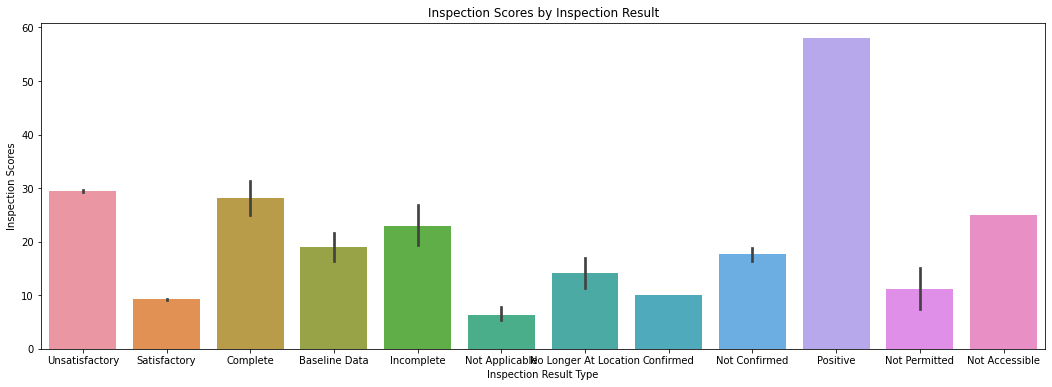

In [76]:
import matplotlib.pyplot as plt

# barplot total Inspection Score per Inspection Result
plt.figure(figsize=(18,6))
sns.barplot(x= 'Inspection Result', y='Inspection Score', data=subset0)
plt.xlabel('Inspection Result Type')
plt.title('Inspection Scores by Inspection Result')
plt.ylabel('Inspection Scores')
plt.show()